In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pygimli as pg
from pygimli.physics import ert
from mpl_toolkits.axes_grid1 import make_axes_locatable


# For Jupyter notebooks, use the current working directory
try:
    # For regular Python scripts
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # For Jupyter notebooks
    current_dir = os.getcwd()
# Add the parent directory (OPEN_ERT) to the path
parent_dir = os.path.dirname(os.path.dirname(current_dir))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)


# Import the time-lapse inversion class
from watershed_geophysics.inversion.time_lapse import TimeLapseERTInversion

In [2]:
data_dir = "results/TL_measurements/appres"

# List of ERT data files testing monthly time-lapse inversion
ert_files = [
    "synthetic_data30.dat",
    "synthetic_data60.dat",
    "synthetic_data90.dat",
    "synthetic_data120.dat",
    "synthetic_data150.dat",
    "synthetic_data180.dat",
    "synthetic_data210.dat",
    "synthetic_data240.dat",
    "synthetic_data270.dat",
    "synthetic_data300.dat",
    "synthetic_data330.dat",
    "synthetic_data360.dat",
]

# ert_files = [
#     "synthetic_data30.dat",
#     "synthetic_data90.dat",
#     "synthetic_data150.dat",
#     "synthetic_data210.dat",
#     "synthetic_data270.dat",
#     "synthetic_data330.dat",
# ]


In [3]:
# Full paths to data files
data_files = [os.path.join(data_dir, f) for f in ert_files]

# Measurement times (can be timestamps or any sequential numbers representing time)
measurement_times = [1, 2, 3, 4, 5, 6, 7 ,8, 9, 10, 11, 12]  # Adjust based on your actual acquisition times

# Create a mesh for the inversion (or load an existing one)
data = ert.load(data_files[0])
ert_manager = ert.ERTManager(data)
mesh = ert_manager.createMesh(data=data, quality=34)

# Set up inversion parameters
inversion_params = {
    "lambda_val": 50.0,              # Regularization parameter
    "alpha": 10.0,                   # Temporal regularization parameter
    "decay_rate": 0.0,               # Temporal decay rate
    "method": "cgls",                # Solver method ('cgls', 'lsqr', etc.)
    "model_constraints": (0.001, 1e4), # Min/max resistivity values (ohm-m)
    "max_iterations": 15,            # Maximum iterations
    "absoluteUError": 0.0,           # Absolute data error (V)
    "relativeError": 0.05,           # Relative data error (5%)
    "lambda_rate": 1.0,              # Lambda reduction rate
    "lambda_min": 1.0,               # Minimum lambda value
    "inversion_type": "L2"           # 'L1', 'L2', or 'L1L2'
}

# Create the time-lapse inversion object
inversion = TimeLapseERTInversion(
    data_files=data_files,
    measurement_times=measurement_times,
    mesh=mesh,
    **inversion_params
)

# Run the inversion
print("Starting time-lapse inversion...")
result = inversion.run()
print("Inversion complete!")

04/04/25 - 14:32:41 - pyGIMLi - INFO - Found 2 regions.
04/04/25 - 14:32:41 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
04/04/25 - 14:32:41 - pyGIMLi - INFO - Found 2 regions.
04/04/25 - 14:32:41 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
04/04/25 - 14:32:41 - pyGIMLi - INFO - Found 2 regions.
04/04/25 - 14:32:41 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
04/04/25 - 14:32:41 - pyGIMLi - INFO - Found 2 regions.
04/04/25 - 14:32:41 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
04/04/25 - 14:32:41 - pyGIMLi - INFO - Found 2 regions.
04/04/25 - 14:32:41 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
04/04/25 - 14:32:41 - pyGIMLi - INFO - Found 2 regions.
04/04/25 - 14:32:41 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
04/04/25 - 14:32:41 - pyGIMLi - IN

Starting time-lapse inversion...


04/04/25 - 14:32:41 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
04/04/25 - 14:32:41 - pyGIMLi - INFO - Found 2 regions.
04/04/25 - 14:32:41 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
04/04/25 - 14:32:41 - pyGIMLi - INFO - Found 2 regions.
04/04/25 - 14:32:41 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
04/04/25 - 14:32:41 - pyGIMLi - INFO - Found 2 regions.
04/04/25 - 14:32:41 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
04/04/25 - 14:32:41 - pyGIMLi - INFO - Found 2 regions.
04/04/25 - 14:32:41 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
04/04/25 - 14:32:41 - pyGIMLi - INFO - Creating forward mesh from region infos.
04/04/25 - 14:32:41 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
04/04/25 - 14:32:42 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Ce

-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


04/04/25 - 14:32:54 - pyGIMLi - INFO - Creating forward mesh from region infos.
04/04/25 - 14:32:54 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
04/04/25 - 14:32:54 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
04/04/25 - 14:33:05 - pyGIMLi - INFO - Creating forward mesh from region infos.
04/04/25 - 14:33:05 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
04/04/25 - 14:33:05 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
04/04/25 - 14:33:17 - pyGIMLi - INFO - Creating forward mesh from region infos.
04/04/25 - 14:33:17 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
04/04/25 - 14:33:17 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
04/04/25 - 14:33:28 - pyGIMLi - INFO - Creating forward mesh from region infos.
04/04/25 - 14:33:28 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward tas

ERT chi2: 2345.302026235805
dPhi: 1.0
ERTphi_d: 23302920.932678957, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 67.57961769660317
dPhi: 0.9711851109406714
ERTphi_d: 671471.081433449, ERTphi_m: 18389.206651499622, ERTphi_t: 7058.099155854397
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 5.249437935249755
dPhi: 0.9223221717705334
ERTphi_d: 52158.415324641566, ERTphi_m: 7683.585089448689, ERTphi_t: 6979.3166629788775
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 1.5978825238605392
dPhi: 0.6956088359230185
ERTphi_d: 15876.560757078318, ERTphi_m: 6949.918709080963, ERTphi_t: 6957.586532761845
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.561193727945375
dPhi: 0.022960884400013887
ERTphi_d: 15512.020880865244, ERTphi_m: 6969.777535616112, ERTphi_t: 6915.711746972515
-------------------ERT Iteration: 5 ---------------------------
ERT chi2: 1.54729568

In [15]:
print(result.final_models.shape)

(1364, 12)


In [19]:
result.all_coverage

[array([ 1.14486862,  1.28388781,  1.33376343, ..., -1.25873132,
        -1.45667648, -1.24938184]),
 array([ 1.14486862,  1.28388781,  1.33376343, ..., -1.25873132,
        -1.45667648, -1.24938184]),
 array([ 1.14486862,  1.28388781,  1.33376343, ..., -1.25873132,
        -1.45667648, -1.24938184]),
 array([ 1.14486862,  1.28388781,  1.33376343, ..., -1.25873132,
        -1.45667648, -1.24938184]),
 array([ 1.14486862,  1.28388781,  1.33376343, ..., -1.25873132,
        -1.45667648, -1.24938184]),
 array([ 1.14486862,  1.28388781,  1.33376343, ..., -1.25873132,
        -1.45667648, -1.24938184]),
 array([ 1.14486862,  1.28388781,  1.33376343, ..., -1.25873132,
        -1.45667648, -1.24938184]),
 array([ 1.14486862,  1.28388781,  1.33376343, ..., -1.25873132,
        -1.45667648, -1.24938184]),
 array([ 1.14486862,  1.28388781,  1.33376343, ..., -1.25873132,
        -1.45667648, -1.24938184]),
 array([ 1.14486862,  1.28388781,  1.33376343, ..., -1.25873132,
        -1.45667648, -1.24

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x2abb89fa990>)

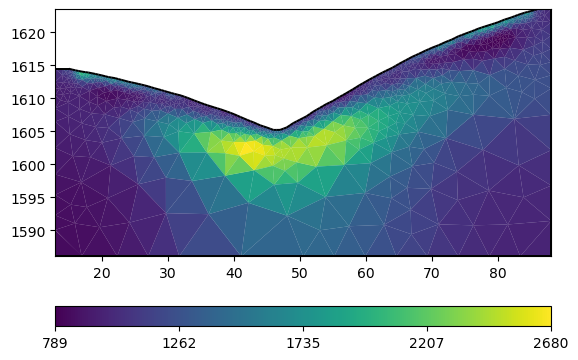

In [18]:
pg.show(result.mesh,result.final_models[:,0])

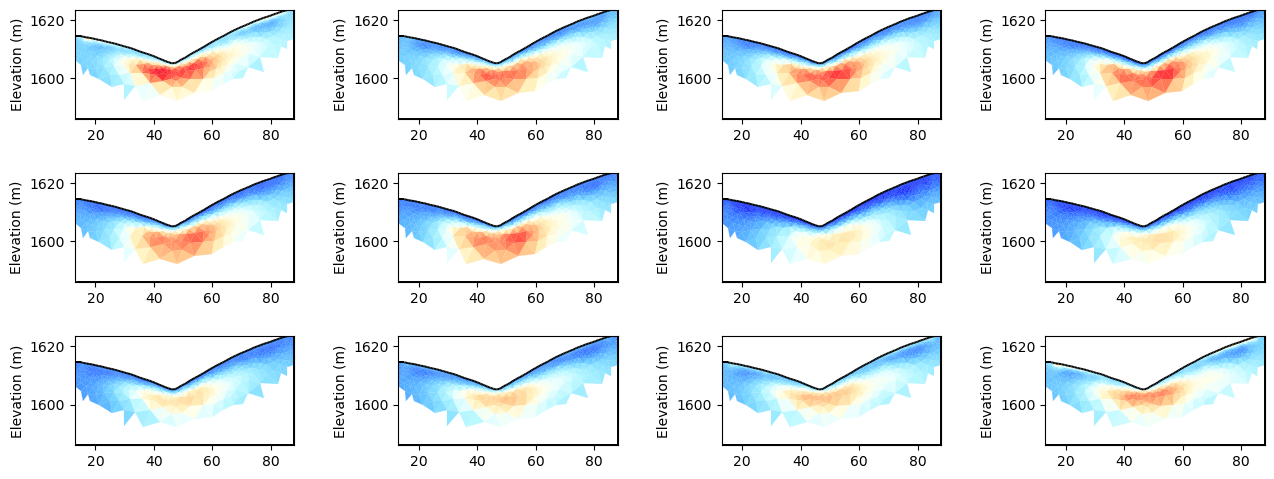

In [35]:
from palettable.lightbartlein.diverging import BlueDarkRed18_18
fixed_cmap = BlueDarkRed18_18.mpl_colormap

fig = plt.figure(figsize=[16,6])

# True resistivity model
for i in range(12):
    ax = fig.add_subplot(3,4,i+1)
    ax, cbar = pg.show(result.mesh,result.final_models[:,i],pad=0.3,orientation="vertical",cMap=fixed_cmap,cMin= 100,cMax = 3000
                    , ylabel="Elevation (m)",label=' Resistivity ($\Omega$ m)',ax=ax,logScale=False,coverage=result.all_coverage[i]>-1)
    cbar.remove()

In [36]:
# Full paths to data files
data_files = [os.path.join(data_dir, f) for f in ert_files]

# Measurement times (can be timestamps or any sequential numbers representing time)
measurement_times = [1, 2, 3, 4, 5, 6, 7 ,8, 9, 10, 11, 12]  # Adjust based on your actual acquisition times

# Create a mesh for the inversion (or load an existing one)
data = ert.load(data_files[0])
ert_manager = ert.ERTManager(data)
mesh = ert_manager.createMesh(data=data, quality=34)

# Set up inversion parameters
inversion_params = {
    "lambda_val": 50.0,              # Regularization parameter
    "alpha": 10.0,                   # Temporal regularization parameter
    "decay_rate": 0.0,               # Temporal decay rate
    "method": "cgls",                # Solver method ('cgls', 'lsqr', etc.)
    "model_constraints": (0.001, 1e4), # Min/max resistivity values (ohm-m)
    "max_iterations": 15,            # Maximum iterations
    "absoluteUError": 0.0,           # Absolute data error (V)
    "relativeError": 0.05,           # Relative data error (5%)
    "lambda_rate": 1.0,              # Lambda reduction rate
    "lambda_min": 1.0,               # Minimum lambda value
    "inversion_type": "L1"           # 'L1', 'L2', or 'L1L2'
}

# Create the time-lapse inversion object
inversion = TimeLapseERTInversion(
    data_files=data_files,
    measurement_times=measurement_times,
    mesh=mesh,
    **inversion_params
)

# Run the inversion
print("Starting time-lapse inversion...")
result_L1 = inversion.run()
print("Inversion complete!")

04/04/25 - 17:05:41 - pyGIMLi - INFO - Found 2 regions.
04/04/25 - 17:05:41 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
04/04/25 - 17:05:45 - pyGIMLi - INFO - Found 2 regions.
04/04/25 - 17:05:45 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
04/04/25 - 17:05:45 - pyGIMLi - INFO - Found 2 regions.
04/04/25 - 17:05:45 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
04/04/25 - 17:05:45 - pyGIMLi - INFO - Found 2 regions.
04/04/25 - 17:05:45 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
04/04/25 - 17:05:45 - pyGIMLi - INFO - Found 2 regions.
04/04/25 - 17:05:45 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
04/04/25 - 17:05:45 - pyGIMLi - INFO - Found 2 regions.
04/04/25 - 17:05:45 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
04/04/25 - 17:05:45 - pyGIMLi - IN

Starting time-lapse inversion...


04/04/25 - 17:05:45 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
04/04/25 - 17:05:45 - pyGIMLi - INFO - Found 2 regions.
04/04/25 - 17:05:45 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
04/04/25 - 17:05:45 - pyGIMLi - INFO - Found 2 regions.
04/04/25 - 17:05:45 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
04/04/25 - 17:05:45 - pyGIMLi - INFO - Found 2 regions.
04/04/25 - 17:05:45 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
04/04/25 - 17:05:45 - pyGIMLi - INFO - Found 2 regions.
04/04/25 - 17:05:45 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
04/04/25 - 17:05:45 - pyGIMLi - INFO - Found 2 regions.
04/04/25 - 17:05:45 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
04/04/25 - 17:05:45 - pyGIMLi - INFO - Found 2 regions.
04/04/25 - 17:05:45 - pyGIMLi - IN

-6.907755278982137 9.210340371976184
------------------- IRLS Iteration: 1 ---------------------------
-------------------ERT Iteration: 0 ---------------------------


04/04/25 - 17:05:57 - pyGIMLi - INFO - Creating forward mesh from region infos.
04/04/25 - 17:05:57 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
04/04/25 - 17:05:57 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
04/04/25 - 17:06:08 - pyGIMLi - INFO - Creating forward mesh from region infos.
04/04/25 - 17:06:08 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
04/04/25 - 17:06:08 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
04/04/25 - 17:06:18 - pyGIMLi - INFO - Creating forward mesh from region infos.
04/04/25 - 17:06:18 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
04/04/25 - 17:06:18 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
04/04/25 - 17:06:29 - pyGIMLi - INFO - Creating forward mesh from region infos.
04/04/25 - 17:06:29 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward tas

ERT chi2: 2345.302026235805
dPhi: 1.0
ERTphi_d: 9774345.116330786, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 27.889634604489576
dPhi: 0.9881082972288853
ERTphi_d: 796718.9674080006, ERTphi_m: 17837.093633315788, ERTphi_t: 3813.04315882923
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 6.9606485473971045
dPhi: 0.7504216657511675
ERTphi_d: 349998.5930011272, ERTphi_m: 30168.956874421492, ERTphi_t: 12984.679236511522
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 3.3670760941910136
dPhi: 0.5162697741074554
ERTphi_d: 247934.98261233835, ERTphi_m: 37053.57272262225, ERTphi_t: 17688.690179863894
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 2.3394161165230307
dPhi: 0.30520842087321237
ERTphi_d: 211258.72140317806, ERTphi_m: 41537.44763457649, ERTphi_t: 20109.858001641187
-------------------ERT Iteration: 5 ---------------------------
ERT chi2: 1.93482

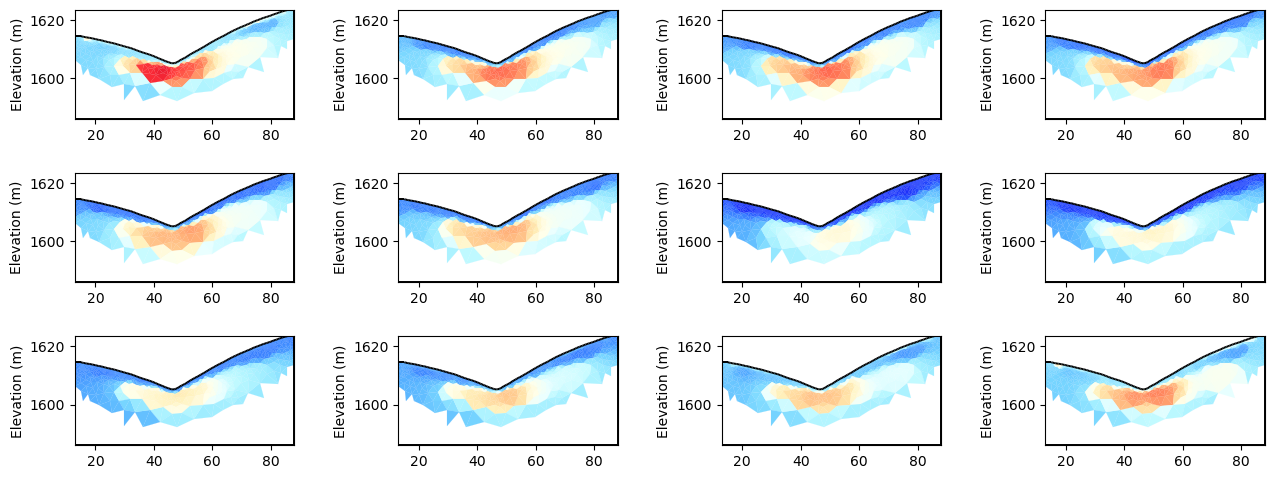

In [37]:
from palettable.lightbartlein.diverging import BlueDarkRed18_18
fixed_cmap = BlueDarkRed18_18.mpl_colormap

fig = plt.figure(figsize=[16,6])

# True resistivity model
for i in range(12):
    ax = fig.add_subplot(3,4,i+1)
    ax, cbar = pg.show(result_L1.mesh,result_L1.final_models[:,i],pad=0.3,orientation="vertical",cMap=fixed_cmap,cMin= 100,cMax = 3000
                    , ylabel="Elevation (m)",label=' Resistivity ($\Omega$ m)',ax=ax,logScale=False,coverage=result.all_coverage[i]>-1)
    cbar.remove()